# STROKE PREDICTION

## Summary of Data

Stroke is the leading cause of disability worldwide and the second leading cause of death. The Global Stroke Factsheet released in 2022 reveals that lifetime risk of developing a stroke has increased by 50% over the last 17 years and now 1 in 4 people is estimated to have a stroke in their lifetime. From 1990 to 2019, there has been a 70% increase in stroke incidence, 43% increase in deaths due to stroke, 102% increase in stroke prevalence and 143% increase in Disability Adjusted Life Years (DALY). The most striking feature is that the bulk of the global stroke burden (86% of deaths due to stroke and 89% of DALYs) occur in lower and lower-middle-income countries. This disproportionate burden experienced by lower and lower-middle income countries has posed an unprecedented problem to families with less resources.

**Objective**

The purpose of the project is to predict whether or not someone will have a stroke. This is a classification problem. The goal is to predict stroke occurrence with high recall (the ratio of true positive predictions to the total of true positives + false negatives). Recall measures how well the model identifies actual stroke cases. High recall is critical in medical applications to ensure that as many stroke cases as possible are identified. We want to minimize the false negatives, which incorrectly predict stroke. This is important when treatments could be costly or dangerous to the patient. 

**Scope**

This project will focus on recall scores and feature selection. We not only want to be able to predict the occurrence of stroke correctly, but also identify which features are the most strongly correlated between having a stroke and not having one. 


## Description of the Dataset

* Source - this is a dataset from kaggle - https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/data?select=healthcare-dataset-stroke-data.csv
* Size - The data contains 5110 observations with 12 attributes.
* Type - the datset contains numerical and categorical data.

## Description of the Columns

1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart    disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) TARGET VARIABLE: stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient



# Importing Modules and Data

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, recall_score
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

import pickle

In [6]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

# Preprocessing 

In [8]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [9]:
df.shape

(5110, 12)

In [10]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


* There are 5 columns with categorical data
* 7 columns are numerical
* 1 column, BMI, has 201 missing values

## Data Cleaning

In [14]:
# drop the 'id' column. it is a unique identifier, which has no predictive power.

df = df.drop(columns='id', axis=1)

In [15]:
# convert all numerical column values to float integer
# select all columns with numerical values

df.select_dtypes(include=['number']).columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke'],
      dtype='object')

In [16]:
# put numerical columns in a variable

columns_to_convert = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke']

In [17]:
# change all numerical columns to float integers

df[columns_to_convert] = df[columns_to_convert].astype(float)

In [18]:
# check the data type change

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   float64
 3   heart_disease      5110 non-null   float64
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   float64
dtypes: float64(6), object(5)
memory usage: 439.3+ KB


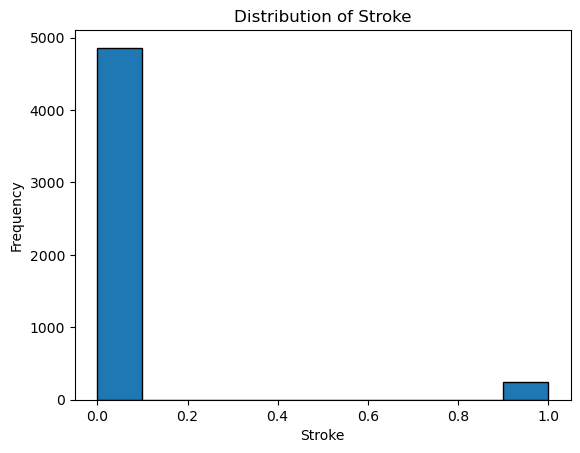

In [19]:
# plot a histogram of stroke distribution

plt.hist(df['stroke'], edgecolor='black')

plt.xlabel('Stroke')
plt.ylabel('Frequency')
plt.title('Distribution of Stroke')

plt.show();

Here we can see that the target variable 'stroke' is highly imbalanced. We will address later with the SMOTE library. Which will resample the stroke data to be more even. 

## Missing Values

### BMI Missing  Values 

What is BMI? 

- BMI is a useful measure of obesity. It is calculated from your height and weight. BMI is an estimate of body fat and a good gauge of your risk for diseases that can occur with more body fat.

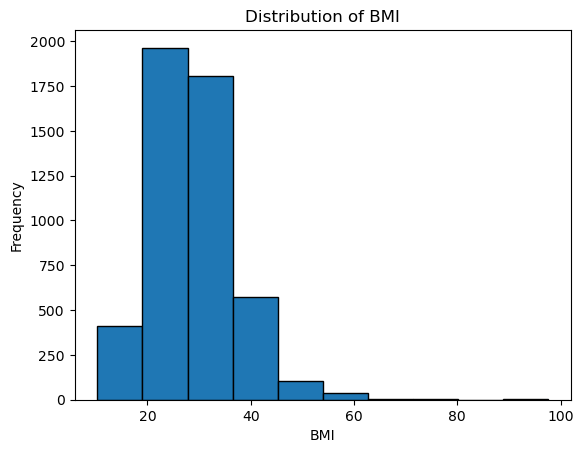

In [23]:
# plot a histogram of BMI value distribution

plt.hist(df['bmi'], edgecolor='black')

plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Distribution of BMI')

plt.show();

In [24]:
# group the bmi median by 'gender', 'ever married', 'work type', and residence type'

bmi_groupby = mode_bmi = pd.DataFrame(df.groupby(['gender', 'ever_married', 'work_type', 'Residence_type'])
                                      ['bmi'].median())

In [25]:
# print the median groupby dataframe

bmi_groupby

bmi
gender ever_married work_type     Residence_type       
Female No           Govt_job      Rural           26.60
                                  Urban           27.10
                    Never_worked  Rural           25.75
                                  Urban           22.90
                    Private       Rural           26.90
                                  Urban           26.15
                    Self-employed Rural           27.95
                                  Urban           29.80
                    children      Rural           18.80
                                  Urban           19.10
       Yes          Govt_job      Rural           28.40
                                  Urban           29.70
                    Private       Rural           29.35
                                  Urban           29.55
                    Self-employed Rural           29.40
                                  Urban           28.70
Male   No           Govt_job      Rural           30.00
                                  Urban           29.00
                    Never_worked  Rural           28.40
                                  Urban           21.05
                    Private       Rural           27.30
                                  Urban           26.80
                    Self-employed Rural           29.45
                                  Urban           30.90
                    children      Rural           18.95
                                  Urban           18.80
       Yes          Govt_job      Rural           29.30
                                  Urban           30.60
                    Private       Rural           30.10
                                  Urban           30.10
                    Self-employed Rural           30.70
                                  Urban           29.30
Other  No           Private       Rural           22.40

In [26]:
# fill the NaN values in BMI by matching with the categorical columns

median_bmi = df.groupby(['gender', 'ever_married', 'work_type', 'Residence_type'])

# fill the the Nan values with the most occuring body type in the make and model group

df['bmi'] = median_bmi['bmi'].transform(lambda x: x.fillna(x.median()))

In [27]:
# check for null values in the bmi column

df['bmi'].isnull().sum()

0

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   float64
 3   heart_disease      5110 non-null   float64
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   float64
dtypes: float64(6), object(5)
memory usage: 439.3+ KB


## Outliers 

### Age

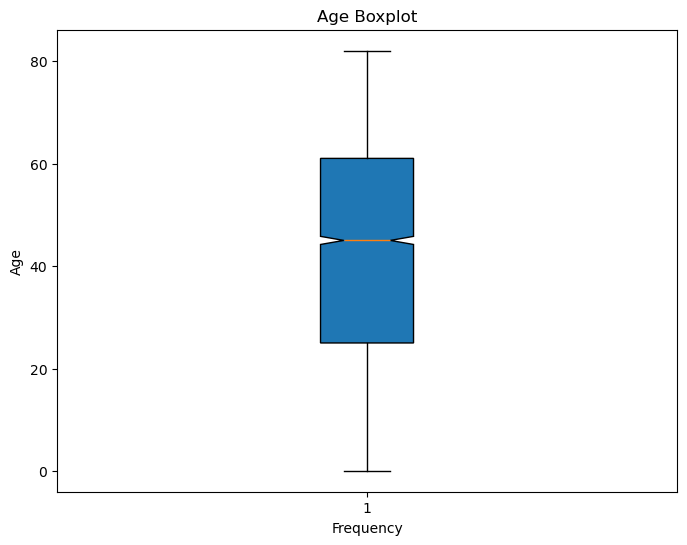

In [31]:
# box plot of the 'age' feature

plt.figure(figsize=(8, 6))

plt.boxplot(df['age'], patch_artist=True, notch=True);

plt.title('Age Boxplot')
plt.xlabel('Frequency')
plt.ylabel('Age')

plt.show()

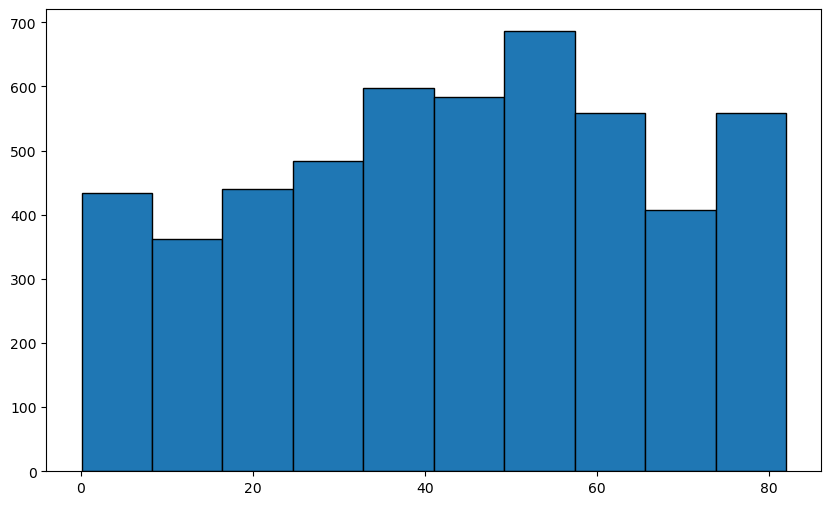

In [32]:
# histogram of Age

plt.figure(figsize=(10, 6))

plt.hist(df['age'], edgecolor='black')

plt.show()

Everything looks good with the 'Age' feature. No outliers

### Hypertension

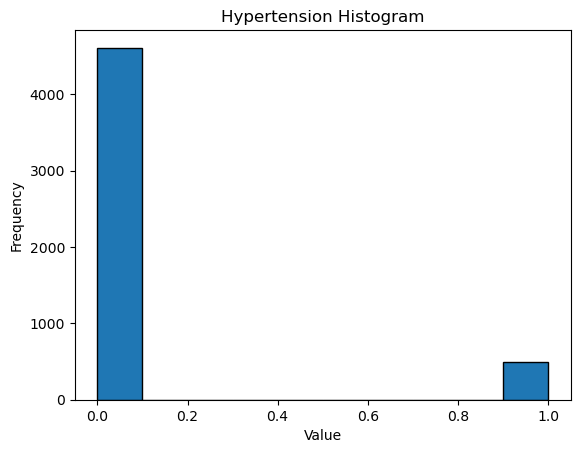

In [35]:
# histogram of Hypertension

plt.hist(df['hypertension'], edgecolor='black')

plt.title('Hypertension Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.show()

There isn't a significant amount of people that have hypertension.

### Heart Disease

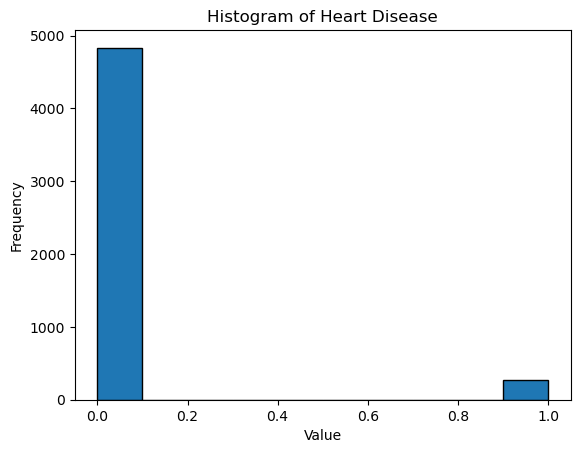

In [38]:
# histogram of Heart Disease

plt.hist(df['heart_disease'], edgecolor='black')

plt.title('Histogram of Heart Disease')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.show()

The hypertension and heart disease histograms are very similar. Almost identical in their distrubtions. 

### Average Glucose Level

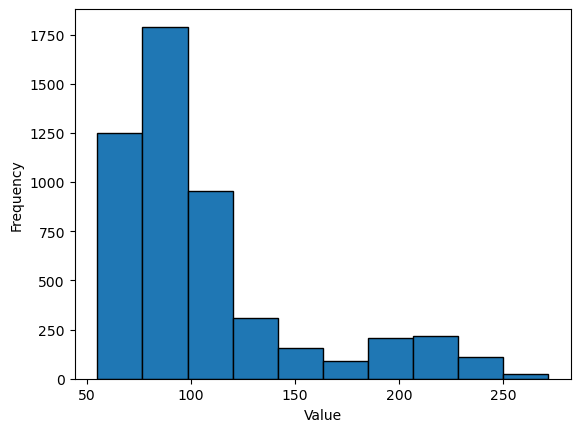

In [41]:
# histogram of Average Glucose Level

plt.hist(df['avg_glucose_level'], edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.show()

Glucose levels refer to the amount of sugar present in the blood. Here are general ranges:

Fasting blood glucose:

* Normal: 70–99 mg/dL
* Prediabetes: 100–125 mg/dL
* Diabetes: ≥126 mg/dL
  
Postprandial (after eating):

* Normal: <140 mg/dL
* Prediabetes: 140–199 mg/dL
* Diabetes: ≥200 mg/dL
  
These ranges help diagnose and monitor blood sugar control, especially for individuals with diabetes.

Judging by the values we have in the histogram, I'm making the assumption that the glucose values were taken postprandial (after eating) and that there are no outliers here that we need to eliminate. 

https://www.niddk.nih.gov/health-information/diabetes/overview/tests-diagnosis

### BMI

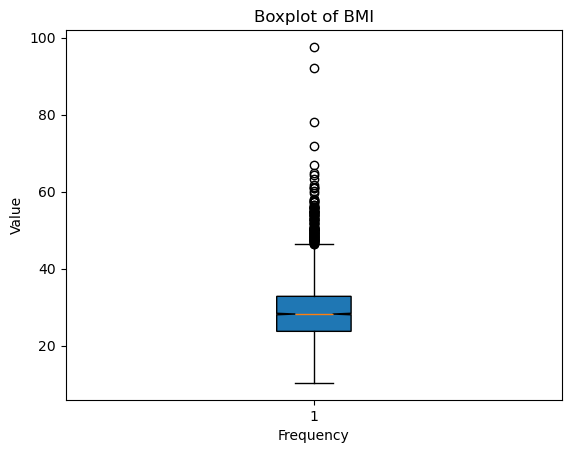

In [44]:
# boxplot of BMI

plt.boxplot(df['bmi'], patch_artist=True, notch=True)

plt.title('Boxplot of BMI')
plt.xlabel('Frequency')
plt.ylabel('Value')

plt.show()

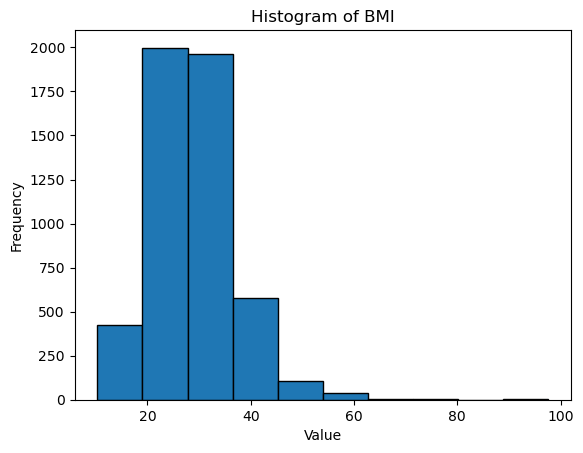

In [45]:
# histogram of BMI

plt.hist(df['bmi'], edgecolor='black')

plt.title('Histogram of BMI')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.show()

The Body Mass Index (BMI) is a measure of body fat based on height and weight. The World Health Organization (WHO) defines the following BMI categories:

1. Underweight: BMI < 18.5
2. Normal weight: BMI 18.5 – 24.9
3. Overweight: BMI 25 – 29.9
4. Obesity (Class I): BMI 30 – 34.9
5. Obesity (Class II): BMI 35 – 39.9
6. Obesity (Class III, severe/morbid obesity): BMI ≥ 40

What I want to do is use this as a guide to fill in the outliers that fall above 40. Since according to the above guide, all of the outliers fall into the severe/morbidly obese category. 

In [48]:
# define a column and threshold value

column = 'bmi'
threshold = 50

# select rows where the value in the column is greater than the threshold

selected_rows = df[df[column] > threshold]

In [49]:
# select the rows that fall above the threshold value of 50

selected_rows.T

,113,254,258,270,333,358,430,466,493,539,...,4223,4225,4351,4407,4475,4650,4779,4838,4906,4952
gender,Female,Female,Female,Female,Female,Male,Female,Female,Female,Female,...,Female,Female,Female,Female,Female,Male,Female,Female,Female,Male
age,45.0,47.0,74.0,57.0,52.0,52.0,52.0,61.0,23.0,43.0,...,52.0,37.0,39.0,34.0,48.0,54.0,58.0,51.0,53.0,51.0
hypertension,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
heart_disease,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ever_married,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes
work_type,Private,Private,Self-employed,Private,Private,Self-employed,Private,Private,Private,Private,...,Self-employed,Private,Private,Private,Govt_job,Private,Self-employed,Private,Private,Self-employed
Residence_type,Rural,Urban,Urban,Rural,Urban,Urban,Urban,Rural,Rural,Rural,...,Rural,Rural,Urban,Urban,Rural,Rural,Urban,Urban,Urban,Rural
avg_glucose_level,224.1,210.95,205.84,129.54,82.24,78.4,72.79,170.05,69.24,80.83,...,59.62,77.1,87.39,70.87,221.08,100.47,66.71,107.72,70.51,211.83
bmi,56.6,50.1,54.6,60.9,54.7,64.8,54.7,60.2,51.0,51.5,...,50.8,55.9,57.9,55.7,57.2,50.2,51.7,60.9,54.1,56.6
smoking_status,never smoked,Unknown,never smoked,smokes,formerly smoked,never smoked,never smoked,smokes,never smoked,Unknown,...,Unknown,Unknown,never smoked,formerly smoked,never smoked,formerly smoked,never smoked,Unknown,never smoked,never smoked


Here I want to see if there are any rows that are similar. Mainly if there is a something out of the ordinary.

Let's check the extreme outliers to see if there is anything weird.

In [51]:
# define a column and threshold value

column = 'bmi'
threshold = 70

# select rows where the value in the column is greater than the threshold

selected_rows = df[df[column] > threshold]

selected_rows.T

,544,928,2128,4209
gender,Male,Female,Male,Male
age,42.0,23.0,17.0,38.0
hypertension,0.0,1.0,1.0,1.0
heart_disease,0.0,0.0,0.0,0.0
ever_married,Yes,No,No,Yes
work_type,Private,Private,Private,Private
Residence_type,Rural,Urban,Rural,Rural
avg_glucose_level,210.48,70.03,61.67,56.9
bmi,71.9,78.0,97.6,92.0
smoking_status,never smoked,smokes,Unknown,never smoked


These extreme values indicate that these people are close to 700 pounds, which I don't think is accurate and does not reflect a sample that is normally distributed. I will use the table from the National Institute of Health as the range seen here in order to manage the outliers: https://www.nhlbi.nih.gov/health/educational/lose_wt/BMI/bmi_tbl.pdf

The max value for BMI is 54. Which means a person can be a maximum of 443 pounds. We will make our threshold value 54.

In [53]:
# define the numeric threshold

threshold = 54

# replace all 'bmi' values greater than the threshold with NaN

df.loc[df['bmi'] > threshold, 'bmi'] = np.nan

In [54]:
# check the null values of the bmi column

df['bmi'].isnull().sum()

44

In [55]:
# fill the missing values in the bmi column with the value 54

df['bmi'] = df['bmi'].fillna(54)

In [56]:
# check the bmi column for missing values

df['bmi'].isnull().sum()

0

In [57]:
df['bmi'].max()

54.0

### Gender

In [59]:
# get the value counts of the gender column to see any outliers

df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [60]:
# get index of rows where Gender is 'Other'

index_to_drop = df[df['gender'] == 'Other'].index

# drop the row that has the 'other' listed as gender

df = df.drop(index=index_to_drop)

## Exploratory Data Analysis

### Correlation Matrix

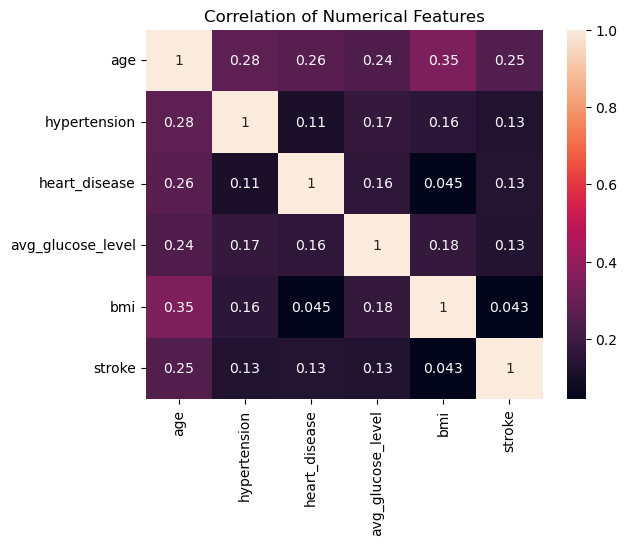

In [63]:
# calculate correlation matrix

correlation_matrix = df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke']].corr()

# create a heatmap

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation of Numerical Features')

plt.show()

### List Correlated Pairs

In [65]:
# unstack the correlation matrix

correlated_features = correlation_matrix.unstack()

# filter to keep only correlations above a certain threshold 

threshold = 0.1
high_corr_pairs = correlated_features[(abs(correlated_features) > threshold) & (abs(correlated_features) < 1.0)]

# sort values

high_corr_pairs = high_corr_pairs.sort_values(ascending=False)

high_corr_pairs

bmi                age                  0.346635
age                bmi                  0.346635
                   hypertension         0.276367
hypertension       age                  0.276367
age                heart_disease        0.263777
heart_disease      age                  0.263777
stroke             age                  0.245239
age                stroke               0.245239
                   avg_glucose_level    0.238323
avg_glucose_level  age                  0.238323
bmi                avg_glucose_level    0.176492
avg_glucose_level  bmi                  0.176492
hypertension       avg_glucose_level    0.174540
avg_glucose_level  hypertension         0.174540
heart_disease      avg_glucose_level    0.161907
avg_glucose_level  heart_disease        0.161907
hypertension       bmi                  0.158113
bmi                hypertension         0.158113
stroke             heart_disease        0.134905
heart_disease      stroke               0.134905
avg_glucose_level  s

## Features and the Target Variable

### Violin Plots

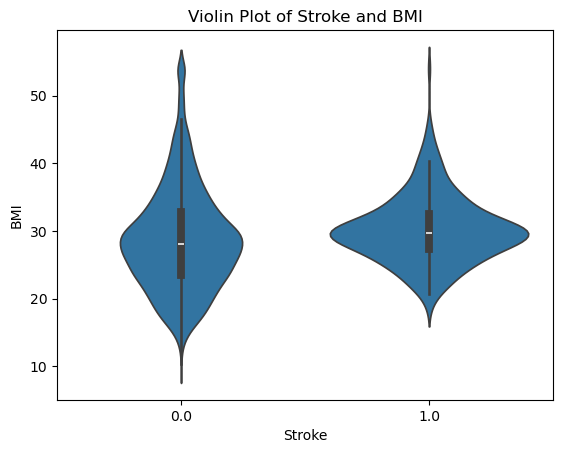

In [68]:
# create a violin plot of stroke and bmi

sns.violinplot(x=df['heart_disease'], y=df['bmi'], data=df)

plt.title('Violin Plot of Stroke and BMI')
plt.xlabel('Stroke')
plt.ylabel('BMI')

plt.show()

Both stroke and non-stroke groups have similar BMI distributions, with most data centered around 25-30.

The median BMI values appear to be roughly similar between the two groups

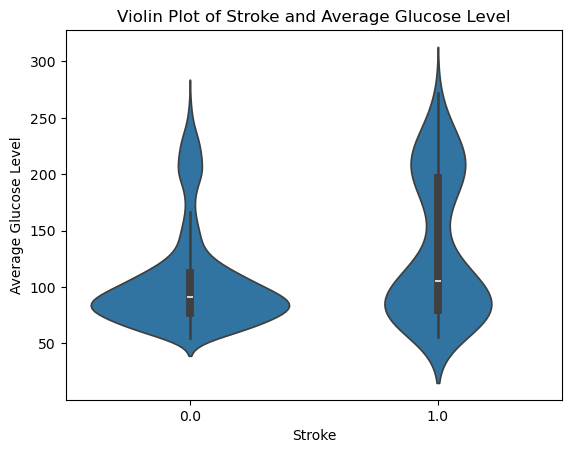

In [70]:
# create a violin plot of stroke and bmi

sns.violinplot(x=df['stroke'], y=df['avg_glucose_level'], data=df)

plt.title('Violin Plot of Stroke and Average Glucose Level')
plt.xlabel('Stroke')
plt.ylabel('Average Glucose Level')

plt.show()

I initially expected glucose levels to be strongly correlated with stroke occurrence, as both the stroke and non-stroke groups show a densely concentrated portion on the violin plot in the same area.

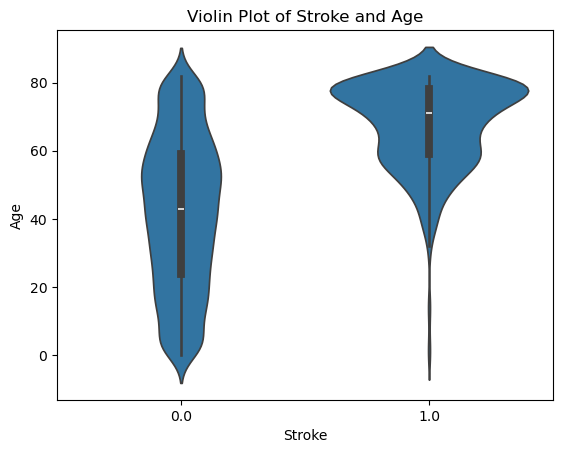

In [72]:
# create a violin plot of stroke and bmi

sns.violinplot(x=df['stroke'], y=df['age'], data=df)

plt.title('Violin Plot of Stroke and Age')
plt.xlabel('Stroke')
plt.ylabel('Age')

plt.show()

Here we can see a high rate of stroke occurring around the age of 80 years old.

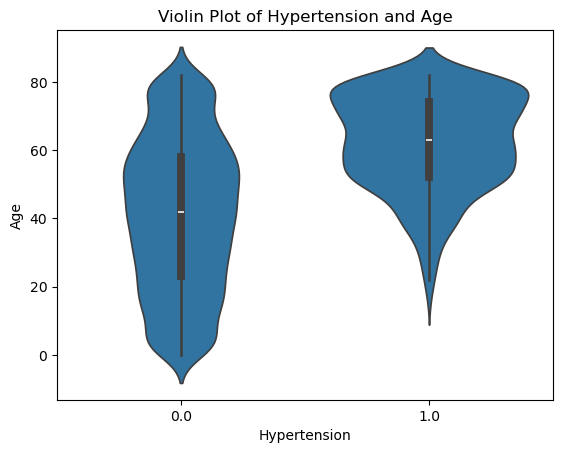

In [74]:
# create a violin plot of stroke and bmi

sns.violinplot(x=df['hypertension'], y=df['age'], data=df)

plt.title('Violin Plot of Hypertension and Age')
plt.xlabel('Hypertension')
plt.ylabel('Age')

plt.show()

No Hypertension (0.0): This group has a broader age distribution, with a high density of individuals between ages 30 to 60. The median age appears to be around 40-45, with a wider spread, indicating that people without hypertension come from a broader range of ages, including younger individuals.

With Hypertension (1.0): This group has a narrower distribution, with most individuals being in the middle to older age ranges, centering around 50-60 years. The violin shape indicates that hypertension is more prevalent in older age groups, with fewer younger individuals in this category.


### Bar Charts

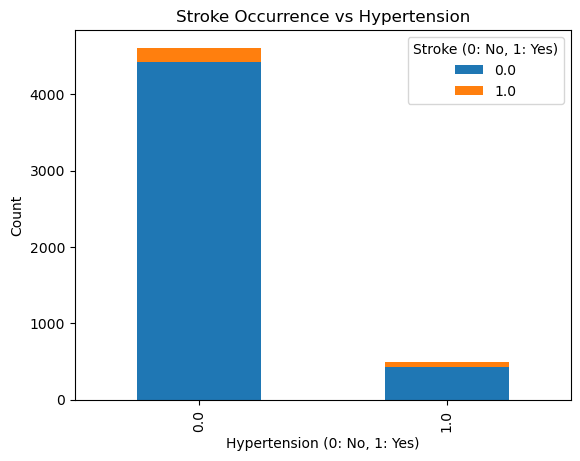

In [77]:
# count occurrences for stroke and hypertension

stroke_hypertension_counts = df.groupby(['hypertension', 'stroke']).size().unstack()

# create the stacked bar chart

stroke_hypertension_counts.plot(kind='bar', stacked=True)

# add labels and title

plt.title('Stroke Occurrence vs Hypertension')
plt.xlabel('Hypertension (0: No, 1: Yes)')
plt.ylabel('Count')
plt.legend(title='Stroke (0: No, 1: Yes)', loc='upper right')

plt.show()

Without Hypertension (0.0): The majority of individuals fall into this category, with a very high count for those without a stroke. Only a small proportion of individuals in this category have had a stroke.

With Hypertension (1.0): A significantly lower count of individuals is in this category compared to the non-hypertensive group. However, within the hypertensive group, a relatively larger proportion has experienced a stroke, showm by the bigger orange section of the bar.

I expected there to be a higher correlation between hypertension and stroke. 

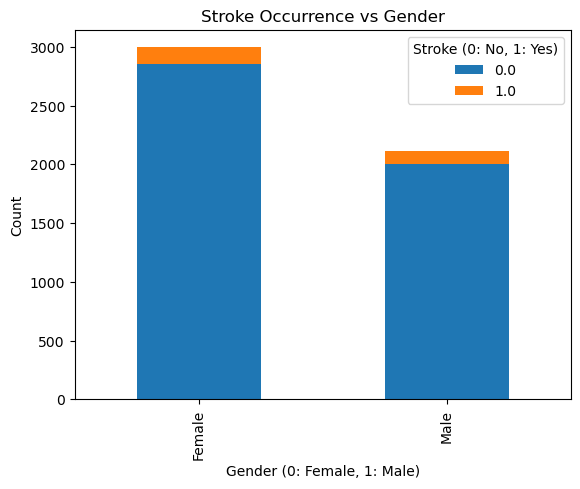

In [79]:
# count occurrences for stroke and gender

stroke_gender_counts = df.groupby(['gender', 'stroke']).size().unstack()

# create the stacked bar chart

stroke_gender_counts.plot(kind='bar', stacked=True)

# add labels and title

plt.title('Stroke Occurrence vs Gender')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Count')
plt.legend(title='Stroke (0: No, 1: Yes)', loc='upper right')

plt.show()

Female (0): There are more females than males in the dataset. The count of females without a stroke is much higher than those with a stroke, as shown by the large blue section and a thin orange section at the top of the bar.

Male (1): The count of males is slightly lower than females, but a similar pattern is observed with a large blue section (no stroke) and a thin orange section (stroke).


## Correlation of Features

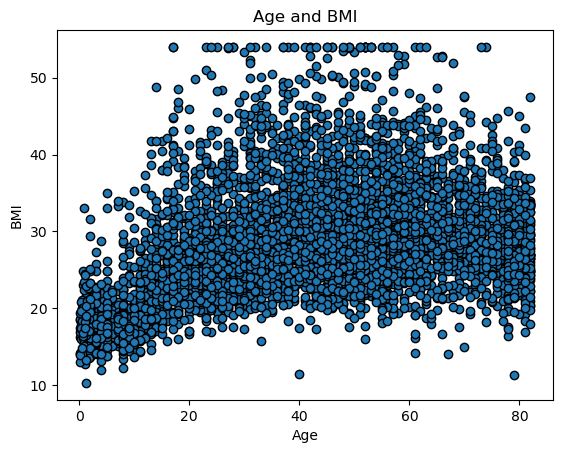

In [82]:
# scatterplot of age and bmi

plt.scatter(df['age'], df['bmi'], edgecolor='black')

plt.title('Age and BMI')
plt.xlabel('Age')
plt.ylabel('BMI')

plt.show()

There doesn't seem to be a significant increase or decrease in BMI with age. Though the older ages ie 30 and above seem to have more variance.

There aren't any clear trends showing a relationship between Age and BMI, suggesting age might influence BMI a little but other factors might play a larger role. 

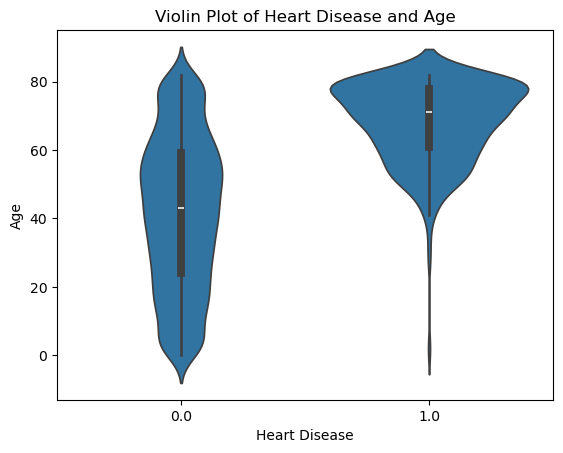

In [84]:
# create a violin plot of age and heart disease

sns.violinplot(x=df['heart_disease'], y=df['age'], data=df)

plt.title('Violin Plot of Heart Disease and Age')
plt.xlabel('Heart Disease')
plt.ylabel('Age')

plt.show()

There is a wider distribution of ages for people without heart disease. The plot is relatively symmetric, indicating a fairly even distribution of ages among individuals without heart disease. 

The distribution is much more concentrated for individuals with heart disease. The people with heart disease are older, primarily in the range of 60-85 years. 

Heart disease is more prevalent as people age. 

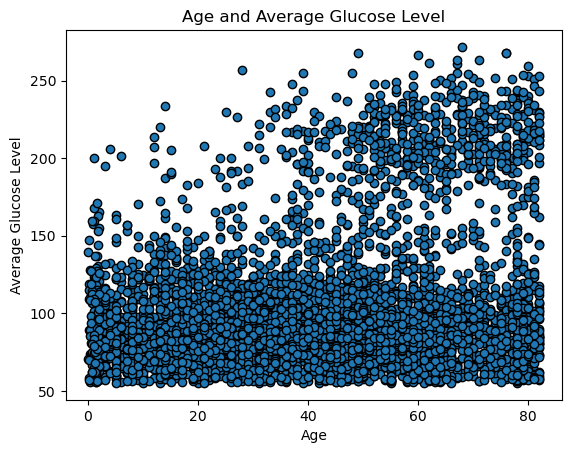

In [86]:
# scatterplot of age and average glucose level

plt.scatter(df['age'], df['avg_glucose_level'], edgecolor='black')

plt.title('Age and Average Glucose Level')
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')

plt.show()

The majority of glucose levels are concentrated between 50 and 150 for people of all ages. 

There doesn't seem to be a strong correlation between age and glucose levels at first glance. However, there are more instances of higher glucose levels above 40 years of age. But these are still reletively spread out. 

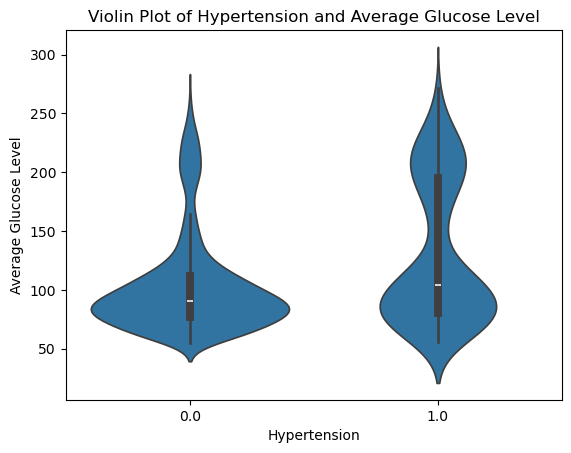

In [88]:
# create a violin plot of average glucose level and hypertension

sns.violinplot(x=df['hypertension'], y=df['avg_glucose_level'], data=df)

plt.title('Violin Plot of Hypertension and Average Glucose Level')
plt.xlabel('Hypertension')
plt.ylabel('Average Glucose Level')

plt.show()

The majority of individuals without hypertension have average glucose levels centered around 90. The distribution is relatively tight, with fewer outliers at higher glucose levels.

People with hypertension have a more spread out distribution of average glucose levels. Those with hypertension have the same density of glucose levels of around 90 but a noticeably higher density around 225. 

This shows that those individuals with hypertension have higher than average glucose levels. 

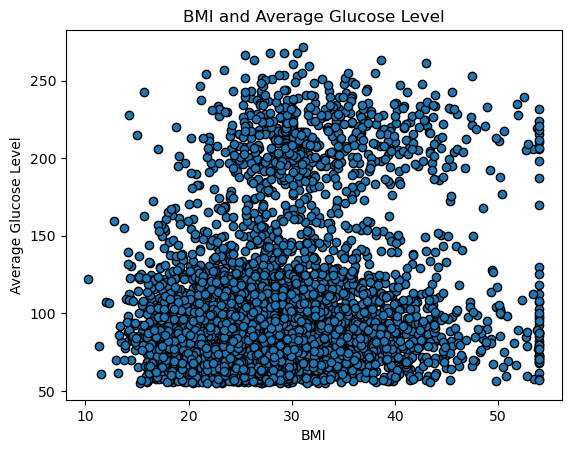

In [90]:
# scatterplot of bmi and average glucose level

plt.scatter(df['bmi'], df['avg_glucose_level'], edgecolor='black')

plt.title('BMI and Average Glucose Level')
plt.xlabel('BMI')
plt.ylabel('Average Glucose Level')

plt.show()

The majority of data points are concentrated between BMI values of 20 and 35 with the average glucose levels being between 50 and 150. 

There doesn't seem to be a strong linear correlation between BMI and glucose levels. There is a wide range of values as age increases. 

## Categorical Variables

In [93]:
df.head().T

,0,1,2,3,4
gender,Male,Female,Male,Female,Female
age,67.0,61.0,80.0,49.0,79.0
hypertension,0.0,0.0,0.0,0.0,1.0
heart_disease,1.0,0.0,1.0,0.0,0.0
ever_married,Yes,Yes,Yes,Yes,Yes
work_type,Private,Self-employed,Private,Private,Self-employed
Residence_type,Urban,Rural,Rural,Urban,Rural
avg_glucose_level,228.69,202.21,105.92,171.23,174.12
bmi,36.6,29.4,32.5,34.4,24.0
smoking_status,formerly smoked,never smoked,never smoked,smokes,never smoked


### Dummy Variables

In [95]:
# select the categorical columns

categorical_cols = df.select_dtypes(include=['object']).columns


# apply get_dummies to only the categorical columns, drop the first dummy column for each

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True).astype(int)

In [96]:
df.head().T

,0,1,2,3,4
age,67,61,80,49,79
hypertension,0,0,0,0,1
heart_disease,1,0,1,0,0
avg_glucose_level,228,202,105,171,174
bmi,36,29,32,34,24
stroke,1,1,1,1,1
gender_Male,1,0,1,0,0
ever_married_Yes,1,1,1,1,1
work_type_Never_worked,0,0,0,0,0
work_type_Private,1,0,1,1,0


In [97]:
# clean the column names

df.columns = (
    df.columns
    .str.strip()                    # remove leading and trailing whitespace
    .str.lower()                    # convert to lowercase
    .str.replace(r'[^a-z0-9]', '_') # replace any non-alphanumeric character with an underscore
    .str.replace(r'__+', '_')       # replace multiple underscores with a single one
    .str.replace('-', '_')
    .str.replace(' ', '_')
)

In [98]:
# check the dataframe

df.head().T

,0,1,2,3,4
age,67,61,80,49,79
hypertension,0,0,0,0,1
heart_disease,1,0,1,0,0
avg_glucose_level,228,202,105,171,174
bmi,36,29,32,34,24
stroke,1,1,1,1,1
gender_male,1,0,1,0,0
ever_married_yes,1,1,1,1,1
work_type_never_worked,0,0,0,0,0
work_type_private,1,0,1,1,0


In [99]:
# export the cleaned dataframe

df.to_csv('stroke_cleaned_for_model.csv', index=False)

# Scaling, Train, Test, Split

In [101]:
X = df.drop(columns=['stroke'], axis=1)
y = df['stroke']

In [102]:
scaler = StandardScaler()

In [103]:
# split the data, since the dataset is unbalanced, pass stratify=y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

Stratify is a parameter used to ensure that the class distribution in the training and test sets reflects the distribution in the original dataset.

In the context of stroke prediction (where you have a minority class of stroke cases), using stratify will ensure that both the training and test sets contain a similar proportion of stroke (1) and non-stroke (0) cases. This helps avoid issues where one of the sets might lack representation of one of the classes, which can lead to biased model evaluation and training.

In [105]:
# fit the scaler on the training data, then transform both train and test sets

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [106]:
# export the scaler for model deployment

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

### SMOTE

In [108]:
# initialize SMOTE with default settings

smote = SMOTE(random_state=42)

In [109]:
# apply SMOTE to the training data

X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

In [110]:
# check the new class distribution

print("Resampled class distribution:", pd.Series(y_train_smote).value_counts())

Resampled class distribution: stroke
0    3888
1    3888
Name: count, dtype: int64


In [111]:
X_train_smote.shape

(7776, 15)

In [112]:
y_train_smote.shape

(7776,)

In [113]:
X_test_scaled.shape

(1022, 15)

In [114]:
# apply SMOTE to un scaled dataframe for Random Forest Classifier

X_train_smote_unscaled, y_train_smote_unscaled = smote.fit_resample(X_train, y_train)

In [115]:
X_train_smote_unscaled.head().T

,0,1,2,3,4
age,48,29,35,38,14
hypertension,0,0,0,0,0
heart_disease,0,0,0,0,0
avg_glucose_level,69,84,119,108,82
bmi,33,21,22,32,31
gender_male,0,0,0,1,1
ever_married_yes,1,0,1,1,0
work_type_never_worked,0,0,0,0,0
work_type_private,1,1,1,1,0
work_type_self_employed,0,0,0,0,0


In [116]:
# converting scaled data back to a DataFrame for the H2o library

# convert SMOTE scaled arrays back to DataFrames

X_train_df = pd.DataFrame(X_train_smote, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test, columns=X_test.columns)

# reset indices to avoid index mismatch issues after SMOTE

X_train_df.reset_index(drop=True, inplace=True)
y_train_smote.reset_index(drop=True, inplace=True)
X_test_df.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

# add target column back

X_train_df['stroke'] = y_train_smote.values
X_test_df['stroke'] = y_test.values

# combine scaled and target-appended training and test data

combined_SMOTE_df = pd.concat([X_train_df, X_test_df], ignore_index=True)

combined_SMOTE_df.head().T

,0,1,2,3,4
age,0.209719,-0.628693,-0.363931,-0.231551,-1.290598
hypertension,-0.323411,-0.323411,-0.323411,-0.323411,-0.323411
heart_disease,-0.245319,-0.245319,-0.245319,-0.245319,-0.245319
avg_glucose_level,-0.815140,-0.479294,0.304346,0.058059,-0.524074
bmi,0.618684,-0.984292,-0.850711,0.485102,0.351521
gender_male,-0.839671,-0.839671,-0.839671,1.190942,1.190942
ever_married_yes,0.717905,-1.392942,0.717905,0.717905,-1.392942
work_type_never_worked,-0.062692,-0.062692,-0.062692,-0.062692,-0.062692
work_type_private,0.870980,0.870980,0.870980,0.870980,-1.148132
work_type_self_employed,-0.440434,-0.440434,-0.440434,-0.440434,-0.440434


In [117]:
# export the cleaned dataframe for H2o

df.to_csv('stroke_cleaned_for_model.csv', index=False)

In [118]:
combined_SMOTE_df.to_csv('stroke_cleaned_SMOTE.csv', index=False)

# Model Selection

## Evalution Function

In [121]:
# create a function for evaluation that prints a confusion matrix, classification report, and auc scores

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_train_scores = model.predict_proba(X_train)[:, 1]
    y_pred = model.predict(X_test)
    y_test_scores = model.predict_proba(X_test)[:, 1]

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("AUC_score_test", round(roc_auc_score(y_test, y_test_scores),2))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    print("AUC_score_test", round(roc_auc_score(y_train, y_train_scores),2))

In [122]:
def metric_df(model, X_train, y_train, X_test, y_test,name):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    scores = {name: {"accuracy" : accuracy_score(y_test,y_pred),
    "precision" : precision_score(y_test, y_pred),
    "recall" : recall_score(y_test, y_pred),                          
    "f1" : f1_score(y_test,y_pred),
     "True Negative Rate": confusion_matrix(y_test,y_pred)[0][0]/confusion_matrix(y_test,y_pred).sum(),
     "False Positive Rate": confusion_matrix(y_test,y_pred)[0][1]/confusion_matrix(y_test,y_pred).sum(),
    "False Negative Rate": confusion_matrix(y_test,y_pred)[1][0]/confusion_matrix(y_test,y_pred).sum(),
    "True Positive Rate": confusion_matrix(y_test,y_pred)[1][1]/confusion_matrix(y_test,y_pred).sum()}}
    return pd.DataFrame(scores)

## Logistic Regression

In [124]:
# create instance of a Logistic Regression

log = LogisticRegression(max_iter=1000, class_weight='balanced') # assign class weight = balanced since the dataset is unbalance

In [125]:
# fit the logistic model to regular scaled data, NOT smote

log.fit(X_train_scaled, y_train);

In [126]:
# get the absolute values of the coefficients to measure importance

feature_importance_log = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(log.coef_[0])
}).sort_values(by='Importance', ascending=False)

In [127]:
# make predictions on the scaled test set 

y_pred = log.predict(X_test_scaled)

In [128]:
# get probabilities for the positive class

y_pred_prob = log.predict_proba(X_test_scaled)[:, 1]

In [129]:
# evaluation metrics

eval_metric(log, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[716 256]
 [ 10  40]]
              precision    recall  f1-score   support

           0       0.99      0.74      0.84       972
           1       0.14      0.80      0.23        50

    accuracy                           0.74      1022
   macro avg       0.56      0.77      0.54      1022
weighted avg       0.94      0.74      0.81      1022

AUC_score_test 0.84

Train_Set
[[2861 1027]
 [  36  163]]
              precision    recall  f1-score   support

           0       0.99      0.74      0.84      3888
           1       0.14      0.82      0.23       199

    accuracy                           0.74      4087
   macro avg       0.56      0.78      0.54      4087
weighted avg       0.95      0.74      0.81      4087

AUC_score_test 0.85


In [130]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

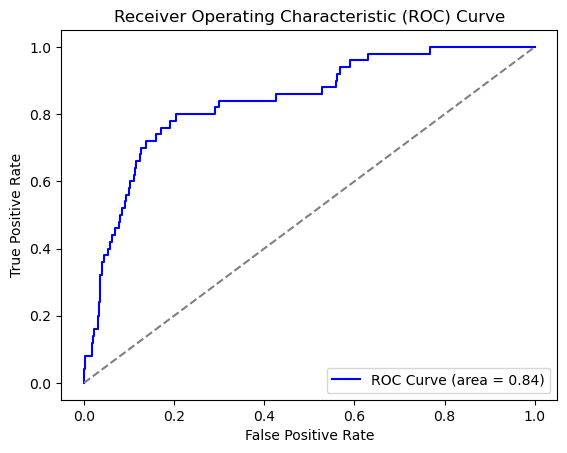

In [131]:
# plot the ROC curve

plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [132]:
feature_importance_log

,Feature,Importance
0,age,1.893379
10,work_type_children,0.348118
3,avg_glucose_level,0.208813
1,hypertension,0.184517
7,work_type_never_worked,0.179861
13,smoking_status_never_smoked,0.110670
14,smoking_status_smokes,0.105709
11,residence_type_urban,0.086812
6,ever_married_yes,0.080798
9,work_type_self_employed,0.076847


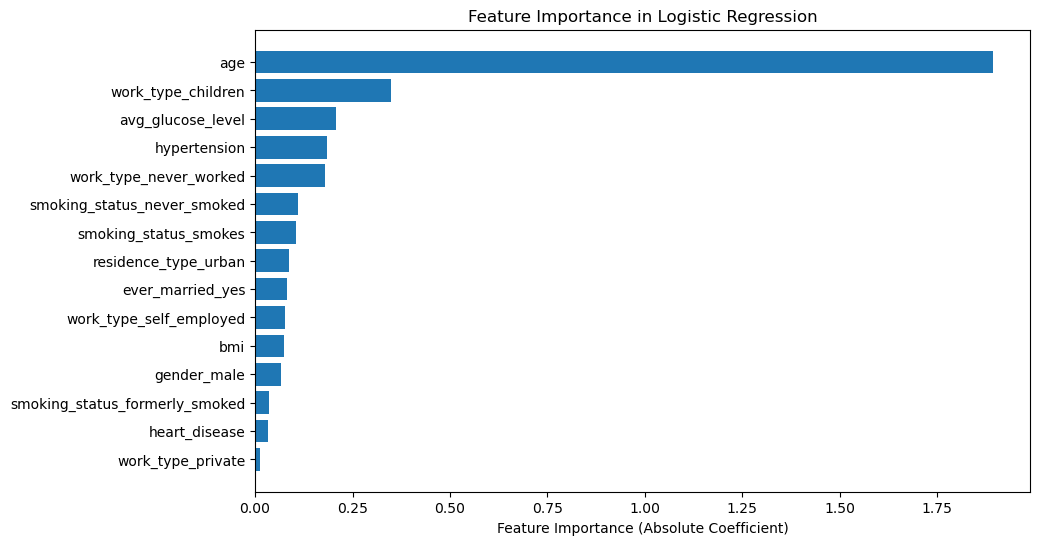

In [133]:
# get feature names and coefficients

features = X_train.columns  
coefficients = log.coef_.flatten()  # flatten to get a 1D array

# compute absolute values of coefficients for importance

importance = np.abs(coefficients)

# create a dataframe

importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})

# sort features by importance

importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], align='center')
plt.xlabel("Feature Importance (Absolute Coefficient)")
plt.title("Feature Importance in Logistic Regression")
plt.gca().invert_yaxis()  # invert y-axis to show the most important features at the top
plt.show()

### Logistic Regression with SMOTE

In [135]:
log_smote = LogisticRegression(max_iter=1000)

# fit the logistic model to SMOTE data

log_smote.fit(X_train_smote, y_train_smote);

# make predictions on the scaled test set 

y_pred = log_smote.predict(X_test_scaled)

# get probabilities for the positive class

y_pred_prob = log.predict_proba(X_test_scaled)[:, 1]

# evaluation metrics

eval_metric(log_smote, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[715 257]
 [ 10  40]]
              precision    recall  f1-score   support

           0       0.99      0.74      0.84       972
           1       0.13      0.80      0.23        50

    accuracy                           0.74      1022
   macro avg       0.56      0.77      0.54      1022
weighted avg       0.94      0.74      0.81      1022

AUC_score_test 0.84

Train_Set
[[2888 1000]
 [  38  161]]
              precision    recall  f1-score   support

           0       0.99      0.74      0.85      3888
           1       0.14      0.81      0.24       199

    accuracy                           0.75      4087
   macro avg       0.56      0.78      0.54      4087
weighted avg       0.95      0.75      0.82      4087

AUC_score_test 0.85


## Random Forest

In [137]:
# initilize the model

rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, class_weight='balanced')

# fit the model to the training data

rf_model.fit(X_train, y_train)

#  predictions

y_pred= rf_model.predict(X_test)

eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[930  42]
 [ 44   6]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       972
           1       0.12      0.12      0.12        50

    accuracy                           0.92      1022
   macro avg       0.54      0.54      0.54      1022
weighted avg       0.91      0.92      0.92      1022

AUC_score_test 0.78

Train_Set
[[3752  136]
 [   7  192]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      3888
           1       0.59      0.96      0.73       199

    accuracy                           0.97      4087
   macro avg       0.79      0.96      0.85      4087
weighted avg       0.98      0.97      0.97      4087

AUC_score_test 0.99


The model is overfitting on the training set with a near perfect accuracy. 

### Random Forest with SMOTE

In [140]:
# fit to SMOTE unscaled data

rf_model_smote = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# fit model to training data

rf_model_smote.fit(X_train_smote_unscaled, y_train_smote_unscaled)

# predictions

y_pred = rf_model_smote.predict(X_test)

# evaluation

eval_metric(rf_model_smote, X_train, y_train, X_test, y_test)

Test_Set
[[889  83]
 [ 39  11]]
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       972
           1       0.12      0.22      0.15        50

    accuracy                           0.88      1022
   macro avg       0.54      0.57      0.54      1022
weighted avg       0.92      0.88      0.90      1022

AUC_score_test 0.75

Train_Set
[[3611  277]
 [  41  158]]
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      3888
           1       0.36      0.79      0.50       199

    accuracy                           0.92      4087
   macro avg       0.68      0.86      0.73      4087
weighted avg       0.96      0.92      0.94      4087

AUC_score_test 0.96


The random forest is clearly overfitting on the training data. With a AUC score of 0.96 on the training set and 0.77 on the test set.

To reduce overfitting I would limit the depth of the trees, 'max_depth' to reduce the depth of each tree. 

Require a minimum number of samples for a node to be split or for a leaf to form. This helps prevent the tree from making too many small branches. 

Regularization to penalize large values. 

### Random Forest TUNE

In [144]:
rf_tune = RandomForestClassifier(random_state=42, class_weight='balanced')

# parameter grid

param_grid = { 'n_estimators': [150,200, 250],
'max_depth': [4, 5,6],
'min_samples_split': [2,3,4]
}

grid_rf = GridSearchCV(estimator=rf_tune, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1, verbose=1)

# fit the model

grid_rf.fit(X_train, y_train)

# show best parameters

print(f"Best Parameters: {grid_rf.best_params_}")

eval_metric(grid_rf, X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'max_depth': 4, 'min_samples_split': 3, 'n_estimators': 200}
Test_Set
[[640 332]
 [  9  41]]
              precision    recall  f1-score   support

           0       0.99      0.66      0.79       972
           1       0.11      0.82      0.19        50

    accuracy                           0.67      1022
   macro avg       0.55      0.74      0.49      1022
weighted avg       0.94      0.67      0.76      1022

AUC_score_test 0.82

Train_Set
[[2570 1318]
 [  15  184]]
              precision    recall  f1-score   support

           0       0.99      0.66      0.79      3888
           1       0.12      0.92      0.22       199

    accuracy                           0.67      4087
   macro avg       0.56      0.79      0.51      4087
weighted avg       0.95      0.67      0.77      4087

AUC_score_test 0.88


In [145]:
# access the best estimator from the grid search and get feature importances

importance = grid_rf.best_estimator_.feature_importances_

# create dataframe

feature_importance_rf = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importance
})

# sort

feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)

feature_importance_rf

,Feature,Importance
0,age,5.164276e-01
3,avg_glucose_level,1.255221e-01
6,ever_married_yes,8.554438e-02
1,hypertension,6.951069e-02
4,bmi,6.232734e-02
10,work_type_children,5.526527e-02
2,heart_disease,3.182444e-02
9,work_type_self_employed,1.491683e-02
12,smoking_status_formerly_smoked,1.293900e-02
13,smoking_status_never_smoked,7.159514e-03


## Support Vector Machines

In [147]:
# initalize the model
# sklearn use linear support vector = runs faster

svm_model = SVC(kernel='linear', C=1.0, random_state=42, probability=True, class_weight='balanced')

In [148]:
# fit the model to the training data

svm_model.fit(X_train_scaled, y_train);

In [149]:
# make predcitions

y_pred = svm_model.predict(X_test_scaled)

In [150]:
# get the absolute values of the coefficients for feature importance

feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': np.abs(svm_model.coef_[0])
}).sort_values(by='importance', ascending=False)

In [151]:
# get probabilities for the positive class

y_pred_prob = svm_model.predict_proba(X_test_scaled)[:, 1]

In [152]:
# y_true: Ground truth labels (1 for positive, 0 for negative)
# y_pred_prob: Predicted probabilities for the positive class

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

In [153]:
# evaluation

eval_metric(svm_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[696 276]
 [  9  41]]
              precision    recall  f1-score   support

           0       0.99      0.72      0.83       972
           1       0.13      0.82      0.22        50

    accuracy                           0.72      1022
   macro avg       0.56      0.77      0.53      1022
weighted avg       0.95      0.72      0.80      1022

AUC_score_test 0.84

Train_Set
[[2795 1093]
 [  33  166]]
              precision    recall  f1-score   support

           0       0.99      0.72      0.83      3888
           1       0.13      0.83      0.23       199

    accuracy                           0.72      4087
   macro avg       0.56      0.78      0.53      4087
weighted avg       0.95      0.72      0.80      4087

AUC_score_test 0.85


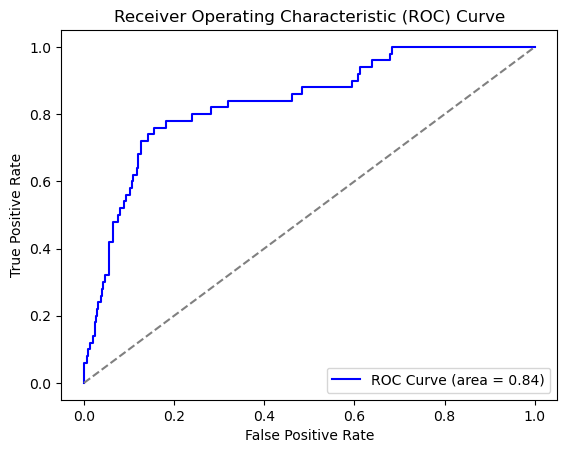

In [154]:
# plot the ROC curve

plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [155]:
feature_importance

,feature,importance
0,age,1.412400e+00
10,work_type_children,4.892699e-01
3,avg_glucose_level,1.938928e-01
14,smoking_status_smokes,1.238452e-01
6,ever_married_yes,1.182931e-01
13,smoking_status_never_smoked,9.907086e-02
1,hypertension,9.215611e-02
8,work_type_private,5.991005e-02
2,heart_disease,5.759938e-02
11,residence_type_urban,5.109445e-02


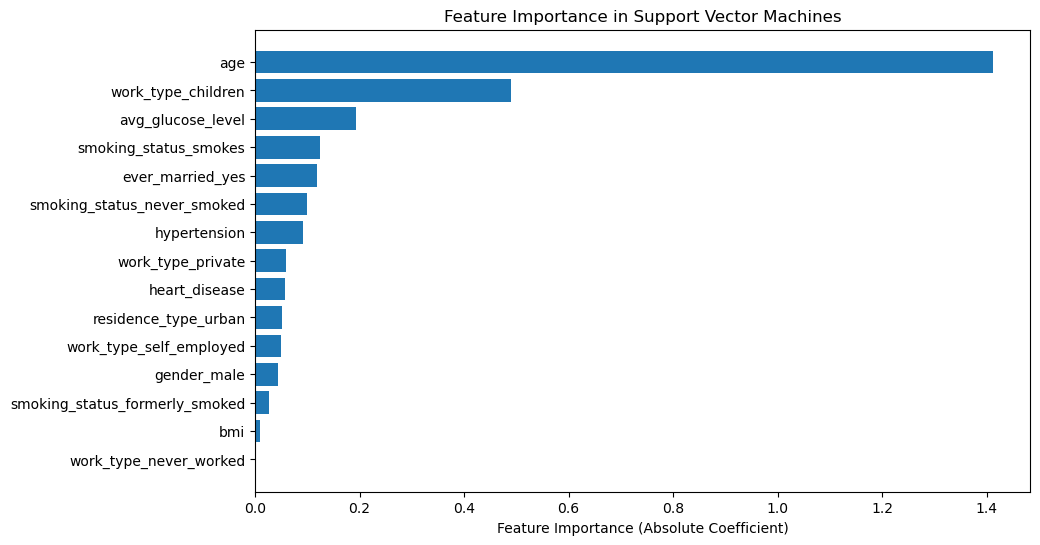

In [156]:
features = X_train.columns 
coefficients = svm_model.coef_.flatten()  # flatten

# get absolute values of coefficients

importance = np.abs(coefficients)

# make a dataframe

importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})

# sort the values

importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], align='center')
plt.xlabel("Feature Importance (Absolute Coefficient)")
plt.title("Feature Importance in Support Vector Machines")
plt.gca().invert_yaxis()  # invert to show the most important at the top
plt.show()

### SVM with SMOTE

In [158]:
svm_model_smote = SVC(kernel='linear', C=1.0, random_state=42, probability=True)

svm_model_smote.fit(X_train_smote, y_train_smote);

y_pred = svm_model_smote.predict(X_test_scaled)

In [159]:
# get the absolute values of the coefficients to measure importance

feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': np.abs(svm_model_smote.coef_[0])
}).sort_values(by='importance', ascending=False)

In [160]:
# get probabilities for the positive class

y_pred_prob = svm_model_smote.predict_proba(X_test_scaled)[:, 1]

In [161]:
# y_true: Ground truth labels (1 for positive, 0 for negative)
# y_pred_prob: Predicted probabilities for the positive class

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

In [162]:
# evaluation

eval_metric(svm_model_smote, X_train_smote, y_train_smote, X_test_scaled, y_test)

Test_Set
[[685 287]
 [  9  41]]
              precision    recall  f1-score   support

           0       0.99      0.70      0.82       972
           1       0.12      0.82      0.22        50

    accuracy                           0.71      1022
   macro avg       0.56      0.76      0.52      1022
weighted avg       0.94      0.71      0.79      1022

AUC_score_test 0.84

Train_Set
[[2788 1100]
 [ 452 3436]]
              precision    recall  f1-score   support

           0       0.86      0.72      0.78      3888
           1       0.76      0.88      0.82      3888

    accuracy                           0.80      7776
   macro avg       0.81      0.80      0.80      7776
weighted avg       0.81      0.80      0.80      7776

AUC_score_test 0.85


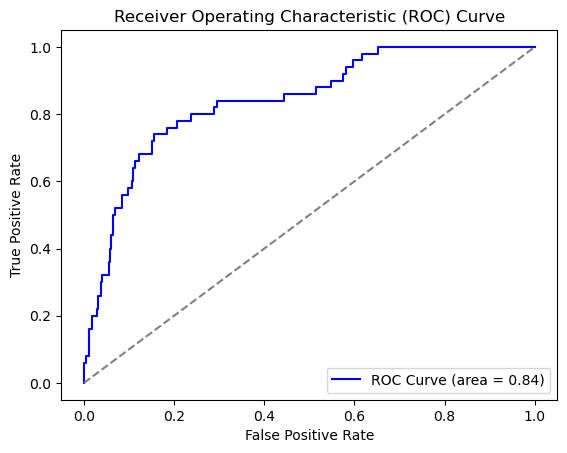

In [163]:
# plot the ROC curve

plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [164]:
feature_importance

,feature,importance
0,age,1.633012e+00
10,work_type_children,6.486560e-01
13,smoking_status_never_smoked,1.577803e-01
3,avg_glucose_level,1.479100e-01
1,hypertension,1.013456e-01
14,smoking_status_smokes,9.721337e-02
11,residence_type_urban,8.304914e-02
5,gender_male,6.855735e-02
8,work_type_private,5.797067e-02
9,work_type_self_employed,4.858334e-02


### SVM TUNE

In [166]:
param_grid = {'C': [0.02, 0.04, 0.06],
              'gamma': [0.02, 0.04],
              'kernel': ['rbf','linear']}

svm_model_tune = SVC(class_weight='balanced', probability=True)

svm_model_tune_grid = GridSearchCV(svm_model_tune, param_grid, cv=5, n_jobs=-1)

svm_model_tune_grid.fit(X_train_scaled, y_train);

In [167]:
svm_model_tune_grid.best_params_

{'C': 0.06, 'gamma': 0.02, 'kernel': 'linear'}

In [168]:
svm_model_tune1 = SVC(C=0.06, gamma=0.02, kernel='linear')

In [169]:
svm_model_tune1.fit(X_train_scaled, y_train);

In [170]:
eval_metric(svm_model_tune_grid, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[694 278]
 [  9  41]]
              precision    recall  f1-score   support

           0       0.99      0.71      0.83       972
           1       0.13      0.82      0.22        50

    accuracy                           0.72      1022
   macro avg       0.56      0.77      0.53      1022
weighted avg       0.95      0.72      0.80      1022

AUC_score_test 0.84

Train_Set
[[2783 1105]
 [  33  166]]
              precision    recall  f1-score   support

           0       0.99      0.72      0.83      3888
           1       0.13      0.83      0.23       199

    accuracy                           0.72      4087
   macro avg       0.56      0.77      0.53      4087
weighted avg       0.95      0.72      0.80      4087

AUC_score_test 0.85


In [171]:
# get coefficients from best estimator

coefficients = svm_model_tune_grid.best_estimator_.coef_.flatten()

# get the coefficients 

Importance = np.abs(coefficients)

# display

feature_importance_svm = pd.DataFrame({'Feature': X_train.columns, 'Importance': Importance})
feature_importance_svm = feature_importance.sort_values(by='importance', ascending=False)

feature_importance_svm

,feature,importance
0,age,1.633012e+00
10,work_type_children,6.486560e-01
13,smoking_status_never_smoked,1.577803e-01
3,avg_glucose_level,1.479100e-01
1,hypertension,1.013456e-01
14,smoking_status_smokes,9.721337e-02
11,residence_type_urban,8.304914e-02
5,gender_male,6.855735e-02
8,work_type_private,5.797067e-02
9,work_type_self_employed,4.858334e-02


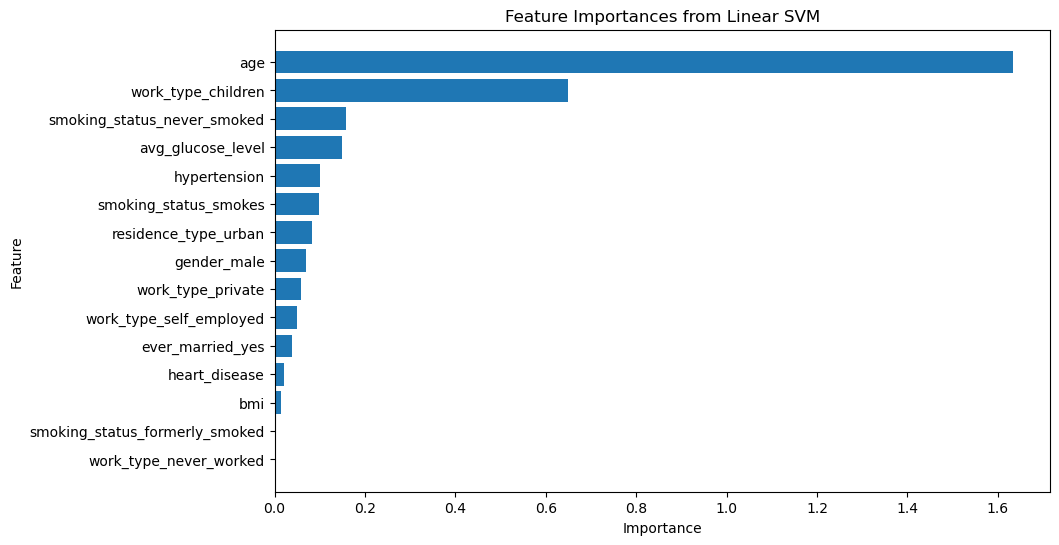

In [172]:
# sort the features by importance

feature_importance = feature_importance.sort_values(by='importance', ascending=False)

# plot 

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importances from Linear SVM")
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

## XG Boost

XGBoost is a boosting algorithm that builds an ensemble of decision trees to make predictions. It uses an iterative process, where each new tree is trained to correct errors made by the previous ones, creating a powerful ensemble of "weak learners" (typically shallow decision trees). This approach makes XGBoost highly flexible and capable of capturing complex patterns in data.

In [175]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train_scaled, y_train);

In [176]:
# predict on the test data

y_pred = xgb_model.predict(X_test_scaled)

# convert probabilities to binary outcomes (for binary classification)

y_pred_binary = [1 if prob > 0.5 else 0 for prob in y_pred]

In [177]:
# get probabilities for the positive class

y_pred_prob = xgb_model.predict_proba(X_test_scaled)[:, 1]

In [178]:
# y_true: Ground truth labels (1 for positive, 0 for negative)
# y_pred_prob: Predicted probabilities for the positive class

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

In [179]:
# evaluation

eval_metric(xgb_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[949  23]
 [ 45   5]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       972
           1       0.18      0.10      0.13        50

    accuracy                           0.93      1022
   macro avg       0.57      0.54      0.55      1022
weighted avg       0.92      0.93      0.92      1022

AUC_score_test 0.77

Train_Set
[[3888    0]
 [  22  177]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3888
           1       1.00      0.89      0.94       199

    accuracy                           0.99      4087
   macro avg       1.00      0.94      0.97      4087
weighted avg       0.99      0.99      0.99      4087

AUC_score_test 1.0


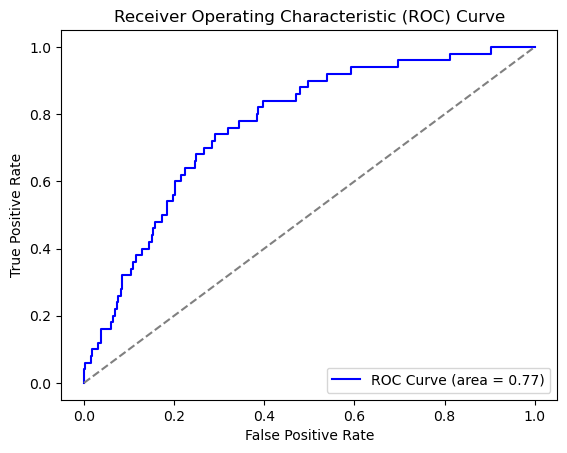

In [180]:
# plot the ROC curve

plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### XG Boost with SMOTE

In [182]:
xgb_model_smote = XGBClassifier()
xgb_model_smote.fit(X_train_smote, y_train_smote);

In [183]:
# predict on the test data

y_pred = xgb_model_smote.predict(X_test_scaled)

# convert probabilities to binary outcomes (for binary classification)

y_pred_binary = [1 if prob > 0.5 else 0 for prob in y_pred]

In [184]:
# get probabilities for the positive class

y_pred_prob = xgb_model_smote.predict_proba(X_test_scaled)[:, 1]

In [185]:
# y_true: Ground truth labels (1 for positive, 0 for negative)
# y_pred_prob: Predicted probabilities for the positive class

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

In [186]:
# evaluation

eval_metric(xgb_model_smote, X_train_smote, y_train_smote, X_test_scaled, y_test)

Test_Set
[[949  23]
 [ 45   5]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       972
           1       0.18      0.10      0.13        50

    accuracy                           0.93      1022
   macro avg       0.57      0.54      0.55      1022
weighted avg       0.92      0.93      0.92      1022

AUC_score_test 0.77

Train_Set
[[3884    4]
 [  32 3856]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3888
           1       1.00      0.99      1.00      3888

    accuracy                           1.00      7776
   macro avg       1.00      1.00      1.00      7776
weighted avg       1.00      1.00      1.00      7776

AUC_score_test 1.0


### XG Boost TUNE

In [188]:
param_grid = {'n_estimators':[200,400],
              'max_depth':[3,4,6], 
              'learning_rate': [0.05, 0.1],
             'gamma':[0.1, 0.2],
             'min_child_weight': [1, 3, 5],
             'subsample': [0.6, 0.8]}

xgb_model = XGBClassifier(random_state=5, eval_metric='error')
xgb_grid = GridSearchCV(xgb_model, param_grid, scoring = 'recall', verbose=0, n_jobs = -1)

# fit the model to grid search

xgb_grid.fit(X_train, y_train)

# Best parameters and best score

print("Best Parameters:", xgb_grid.best_params_)
print("Best AUC Score:", xgb_grid.best_score_)

eval_metric(xgb_grid, X_train, y_train, X_test, y_test)

/opt/anaconda3/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 400, 'subsample': 0.6}
Best AUC Score: 0.08025641025641025
Test_Set
[[955  17]
 [ 45   5]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       972
           1       0.23      0.10      0.14        50

    accuracy                           0.94      1022
   macro avg       0.59      0.54      0.55      1022
weighted avg       0.92      0.94      0.93      1022

AUC_score_test 0.78

Train_Set
[[3888    0]
 [   4  195]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3888
           1       1.00      0.98      0.99       199

    accuracy                           1.00      4087
   macro avg       1.00      0.99      0.99      4087
weighted avg       1.00      1.00      1.00      4087

AUC_score_test 1.0


In [189]:
# access the best estimator from the grid search and get feature importances

importance = xgb_grid.best_estimator_.feature_importances_

# create a DataFrame 
feature_importance_xgb = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importance
})

# sort features by importance in descending order

feature_importance_xgb = feature_importance_xgb.sort_values(by='Importance', ascending=False)

feature_importance_xgb

,Feature,Importance
0,age,0.105600
6,ever_married_yes,0.084025
2,heart_disease,0.080792
1,hypertension,0.080485
4,bmi,0.076248
3,avg_glucose_level,0.075915
13,smoking_status_never_smoked,0.074897
8,work_type_private,0.072206
14,smoking_status_smokes,0.071086
9,work_type_self_employed,0.070759


In [190]:
'''

# Calculate scale_pos_weight
scale_pos_weight = y_train[y_train == 0].shape[0] / y_train[y_train == 1].shape[0]

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'scale_pos_weight': [scale_pos_weight, scale_pos_weight * 1.2, scale_pos_weight * 0.8],
    'learning_rate': [0.01, 0.05, 0.1]
}

# Initialize XGBClassifier with scale_pos_weight
xgb = XGBClassifier(random_state=42)
xgb_grid = GridSearchCV(xgb, param_grid, scoring = 'recall', verbose=0, n_jobs = -1)

# fit the model to grid search

xgb_grid.fit(X_train, y_train)

# Best parameters and best score

print("Best Parameters:", xgb_grid.best_params_)
print("Best AUC Score:", xgb_grid.best_score_)

eval_metric(xgb_grid, X_train, y_train, X_test, y_test)

'''

'\n\n# Calculate scale_pos_weight\nscale_pos_weight = y_train[y_train == 0].shape[0] / y_train[y_train == 1].shape[0]\n\nparam_grid = {\n    \'n_estimators\': [100, 200, 300],\n    \'max_depth\': [3, 4, 5, 6],\n    \'min_child_weight\': [1, 3, 5],\n    \'subsample\': [0.7, 0.8, 1.0],\n    \'colsample_bytree\': [0.7, 0.8, 1.0],\n    \'scale_pos_weight\': [scale_pos_weight, scale_pos_weight * 1.2, scale_pos_weight * 0.8],\n    \'learning_rate\': [0.01, 0.05, 0.1]\n}\n\n# Initialize XGBClassifier with scale_pos_weight\nxgb = XGBClassifier(random_state=42)\nxgb_grid = GridSearchCV(xgb, param_grid, scoring = \'recall\', verbose=0, n_jobs = -1)\n\n# fit the model to grid search\n\nxgb_grid.fit(X_train, y_train)\n\n# Best parameters and best score\n\nprint("Best Parameters:", xgb_grid.best_params_)\nprint("Best AUC Score:", xgb_grid.best_score_)\n\neval_metric(xgb_grid, X_train, y_train, X_test, y_test)\n\n'

### XG Boost TUNE 2

In [192]:
# Calculate scale_pos_weight
scale_pos_weight = y_train[y_train == 0].shape[0] / y_train[y_train == 1].shape[0]

param_grid = {
    'n_estimators': [100],
    'max_depth': [3, 4],
    'min_child_weight': [1],
    'subsample': [0.6, 0.7],
    'colsample_bytree': [0.7],
    'scale_pos_weight': [scale_pos_weight, scale_pos_weight * 1.2, scale_pos_weight * 0.8],
    'learning_rate': [0.03]
}

# Initialize XGBClassifier with scale_pos_weight
xgb = XGBClassifier(random_state=42)
xgb_grid = GridSearchCV(xgb, param_grid, scoring = 'recall', verbose=0, n_jobs = -1)

# fit the model to grid search

xgb_grid.fit(X_train, y_train)

# Best parameters and best score

print("Best Parameters:", xgb_grid.best_params_)
print("Best AUC Score:", xgb_grid.best_score_)

eval_metric(xgb_grid, X_train, y_train, X_test, y_test)

Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'scale_pos_weight': 23.445226130653268, 'subsample': 0.6}
Best AUC Score: 0.8896153846153846
Test_Set
[[648 324]
 [  8  42]]
              precision    recall  f1-score   support

           0       0.99      0.67      0.80       972
           1       0.11      0.84      0.20        50

    accuracy                           0.68      1022
   macro avg       0.55      0.75      0.50      1022
weighted avg       0.95      0.68      0.77      1022

AUC_score_test 0.84

Train_Set
[[2568 1320]
 [  14  185]]
              precision    recall  f1-score   support

           0       0.99      0.66      0.79      3888
           1       0.12      0.93      0.22       199

    accuracy                           0.67      4087
   macro avg       0.56      0.80      0.51      4087
weighted avg       0.95      0.67      0.77      4087

AUC_score_test 0.88


## Gradient Boosting Classifier

In [194]:
# initialize the Gradient Boosting Classifier

gbm_model = GradientBoostingClassifier(
    n_estimators=100,      # number of boosting rounds
    learning_rate=0.1,     # step size for each round
    max_depth=3,           # depth of each tree
    random_state=42
)

# train the model

gbm_model.fit(X_train_scaled, y_train);

In [195]:
# predict on the test data

y_pred = gbm_model.predict(X_test_scaled)

In [196]:
# get probabilities for the positive class

y_pred_prob = gbm_model.predict_proba(X_test_scaled)[:, 1]

In [197]:
# y_true: Ground truth labels (1 for positive, 0 for negative)
# y_pred_prob: Predicted probabilities for the positive class

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

In [198]:
# evaluation

eval_metric(gbm_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[968   4]
 [ 50   0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

AUC_score_test 0.81

Train_Set
[[3888    0]
 [ 178   21]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3888
           1       1.00      0.11      0.19       199

    accuracy                           0.96      4087
   macro avg       0.98      0.55      0.58      4087
weighted avg       0.96      0.96      0.94      4087

AUC_score_test 0.92


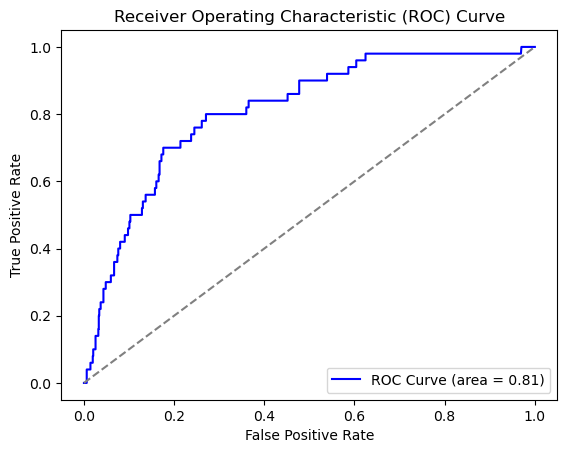

In [199]:
# plot the ROC curve

plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Naive Bayes

In [201]:
# initialize the Gaussian Naive Bayes model

nb_model = GaussianNB()

# train the model

nb_model.fit(X_train_scaled, y_train);

In [202]:
# predict on the test set

y_pred = nb_model.predict(X_test_scaled)

In [203]:
# get probabilities for the positive class

y_pred_prob = nb_model.predict_proba(X_test_scaled)[:, 1]

In [204]:
# y_true: Ground truth labels (1 for positive, 0 for negative)
# y_pred_prob: Predicted probabilities for the positive class

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

In [205]:
# evaluation

eval_metric(nb_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[266 706]
 [  1  49]]
              precision    recall  f1-score   support

           0       1.00      0.27      0.43       972
           1       0.06      0.98      0.12        50

    accuracy                           0.31      1022
   macro avg       0.53      0.63      0.28      1022
weighted avg       0.95      0.31      0.41      1022

AUC_score_test 0.8

Train_Set
[[1050 2838]
 [   1  198]]
              precision    recall  f1-score   support

           0       1.00      0.27      0.43      3888
           1       0.07      0.99      0.12       199

    accuracy                           0.31      4087
   macro avg       0.53      0.63      0.27      4087
weighted avg       0.95      0.31      0.41      4087

AUC_score_test 0.82


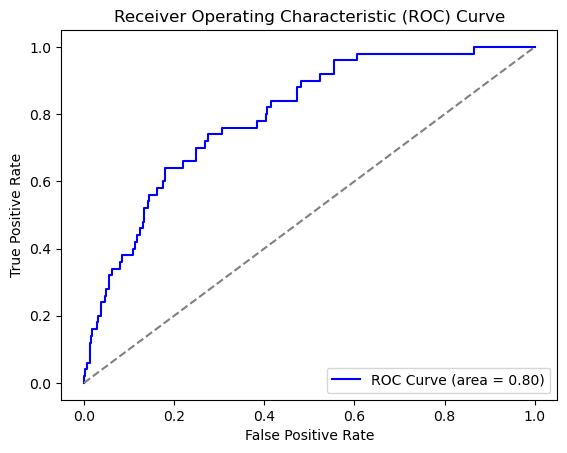

In [206]:
# plot the ROC curve

plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Naive Bayes TUNE with SMOTE

In [208]:
# initialize the Gaussian Naive Bayes model

nb_model_smote = GaussianNB()

# train the model

nb_model_smote.fit(X_train_smote, y_train_smote);

In [209]:
# predict on the test set

y_pred = nb_model_smote.predict(X_test_scaled)

In [210]:
# get probabilities for the positive class

y_pred_prob = nb_model_smote.predict_proba(X_test_scaled)[:, 1]

In [211]:
# y_true: Ground truth labels (1 for positive, 0 for negative)
# y_pred_prob: Predicted probabilities for the positive class

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

In [212]:
# evaluation

eval_metric(nb_model_smote, X_train_smote, y_train_smote, X_test_scaled, y_test)

Test_Set
[[285 687]
 [  1  49]]
              precision    recall  f1-score   support

           0       1.00      0.29      0.45       972
           1       0.07      0.98      0.12        50

    accuracy                           0.33      1022
   macro avg       0.53      0.64      0.29      1022
weighted avg       0.95      0.33      0.44      1022

AUC_score_test 0.79

Train_Set
[[1126 2762]
 [  14 3874]]
              precision    recall  f1-score   support

           0       0.99      0.29      0.45      3888
           1       0.58      1.00      0.74      3888

    accuracy                           0.64      7776
   macro avg       0.79      0.64      0.59      7776
weighted avg       0.79      0.64      0.59      7776

AUC_score_test 0.83


In [213]:
# Access the learned parameters
means = nb_model.theta_  # Mean of features per class
variances = nb_model.var_  # Variance of features per class
class_labels = nb_model.classes_
feature_names = X_train.columns  # Assuming your training data is a DataFrame

# Create a DataFrame for means and variances
means_df = pd.DataFrame(means, columns=feature_names, index=[f"Class_{cls}" for cls in class_labels])
variances_df = pd.DataFrame(variances, columns=feature_names, index=[f"Class_{cls}" for cls in class_labels])

# Combine into a single DataFrame for better readability
summary_df = pd.concat([means_df.add_prefix("Mean_"), variances_df.add_prefix("Variance_")], axis=1)

# Display the DataFrame
summary_df.T


,Class_0,Class_1
Mean_age,-0.055145,1.077402e+00
Mean_hypertension,-0.030884,6.033954e-01
Mean_heart_disease,-0.027459,5.364846e-01
Mean_avg_glucose_level,-0.029202,5.705471e-01
Mean_bmi,-0.010330,2.018295e-01
Mean_gender_male,-0.002461,4.808430e-02
Mean_ever_married_yes,-0.024258,4.739377e-01
Mean_work_type_never_worked,0.003209,-6.269161e-02
Mean_work_type_private,-0.000957,1.869132e-02
Mean_work_type_self_employed,-0.015806,3.088163e-01


## Model Comparision

In [215]:
# Define data as a list of lists

data = [
    ['Logistic Regression', 0.13, 0.80, 0.23],
    ['SMOTE Logistic Regression', 0.14, 0.80, 0.24],
    ['SVM', 0.13, 0.82, 0.22 ],
    ['SMOTE SVM', 0.12, 0.80, 0.22 ],
    ['SVM TUNE', 0.12, 0.80, 0.22 ],
    ['XG Boost', 0.09, 0.04, 0.06 ],
    ['SMOTE XG Boost', 0.23, 0.16, 0.19 ],
    ['XG Boost TUNE 2',0.11, 0.82, 0.20 ],
    ['Random Forest', 0.13, 0.18, 0.15 ],
    ['Random Forest TUNE', 0.11, 0.82, 0.19],
    ['Naive Bayes', 0.6, 0.98, 0.12],
    ['Naive Bayes with SMOTE', 0.7, 0.98, 0.12]
]

# Define column names
columns = ['Model', 'Precision', 'Recall', 'F1-Score']

# Create DataFrame
df = pd.DataFrame(data, columns=columns)

# Display DataFrame

df

,Model,Precision,Recall,F1-Score
0,Logistic Regression,0.13,0.80,0.23
1,SMOTE Logistic Regression,0.14,0.80,0.24
2,SVM,0.13,0.82,0.22
3,SMOTE SVM,0.12,0.80,0.22
4,SVM TUNE,0.12,0.80,0.22
5,XG Boost,0.09,0.04,0.06
6,SMOTE XG Boost,0.23,0.16,0.19
7,XG Boost TUNE 2,0.11,0.82,0.20
8,Random Forest,0.13,0.18,0.15
9,Random Forest TUNE,0.11,0.82,0.19


# Conclusion

In this analysis, various machine learning models were evaluated to predict stroke risk, with a specific focus on handling imbalanced data. Logistic regression, SVM, XGBoost, and Random Forest models were tested, both with and without SMOTE and with GridSearch to address the minority class and tune the model. Key insights from this notebook include:

* 1. Model Performance: Random Forest, SVM, and XGBoost had the highest recall scores after model tuning.

* 2. Feature Importance: Age, average glucose level, and work type emerged as significant features across models. These factors align with medical insights into stroke risk, indicating that data-driven models can complement clinical knowledge.

* 3. Limitations and Future Work: Despite promising results, further work could explore ensemble methods and pipelines to make this process a little bit more organized. I didn't use those methods so I could illustrate my thought process throughout the project, but as time went on and the project got bigger, it became harder to keep track of progress.

This project underscores the potential of machine learning in stroke prediction, yet also the importance of careful model selection and evaluation metrics tailored to imbalanced data.

# Export 

In [219]:
# save the scaler
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [220]:
stroke_rf = 'stroke_random_forest_model.pkl'

with open(stroke_rf, 'wb') as file:
    pickle.dump(rf_tune, file)

In [221]:
# save the feature names for the naive bayes model
nb_model.feature_names_in_= X_train.columns

In [222]:
naive_bayes_model = 'stroke_naive_bayes_model.pkl'

with open(naive_bayes_model, 'wb') as file:
    pickle.dump(nb_model, file)

In [223]:
# XG Boost
xg_boost = 'stroke_xg_boost.pkl'

with open(xg_boost, 'wb') as file:
    pickle.dump(xgb_grid, file)